<a href="https://www.kaggle.com/code/suyashkapil/drug-classification-ml-and-eda?scriptVersionId=118646853" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

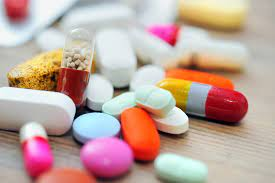

Classifying Drugs based on a small dataset of 215 Drugs consisting of their features.

# **Importing Libraries**

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Importing Dataset**

In [210]:
drug =  pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [211]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [212]:
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No Null Values

# **Data Visualization**

**Drug Distribution by Sex**

Sex
F     96
M    104
Name: Drug, dtype: int64


([<matplotlib.patches.Wedge at 0x7f49078fb050>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Female'),
  Text(-0.06906971127148541, -1.0978293924762963, 'Male')],
 [Text(0.03767433190106138, 0.598816035787126, '48%'),
  Text(-0.03767438796626476, -0.598816032259798, '52%')])

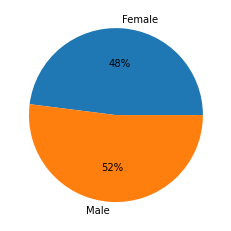

In [213]:
drug_sex = drug.groupby('Sex').count()['Drug']
print(drug_sex)
plt.pie(drug_sex , labels = ['Female','Male'], autopct = '%0.0f%%')

**Drug Distribution by Blood Pressure**

BP
HIGH      77
LOW       64
NORMAL    59
Name: Drug, dtype: int64


([<matplotlib.patches.Wedge at 0x7f4907995950>,
 [Text(0.3888223589862547, 1.0289884222635182, 'HIGH'),
  Text(-1.0563230795297933, -0.3068901296110612, 'LOW'),
  Text(0.660462119378317, -0.8796532208014144, 'NORMAL')],
 [Text(0.21208492308341165, 0.5612664121437371, '38%'),
  Text(-0.576176225198069, -0.1673946161514879, '32%'),
  Text(0.3602520651154456, -0.4798108477098623, '29%')])

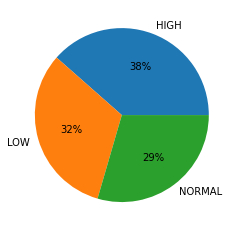

In [214]:
drug_bp = drug.groupby('BP').count()['Drug']
print(drug_bp)
plt.pie(drug_bp , labels = drug_bp.index , autopct = '%0.0f%%')

**Drug Distribution by  Cholesterol**

Cholesterol
HIGH      103
NORMAL     97
Name: Drug, dtype: int64


([<matplotlib.patches.Wedge at 0x7f4907906850>,
 [Text(-0.05181704640055811, 1.09877886478687, 'HIGH'),
  Text(0.05181704640055798, -1.09877886478687, 'NORMAL')],
 [Text(-0.02826384349121351, 0.5993339262473836, '51%'),
  Text(0.028263843491213442, -0.5993339262473836, '49%')])

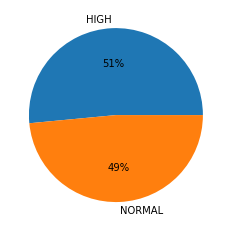

In [215]:
drug_chol = drug.groupby('Cholesterol').count()['Drug']
print(drug_chol)
plt.pie(drug_chol , labels = drug_chol.index , autopct = '%0.0f%%')

**Drug Distribution by Drug Type**

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
Name: Sex, dtype: int64


Text(0, 0.5, 'Frequency')

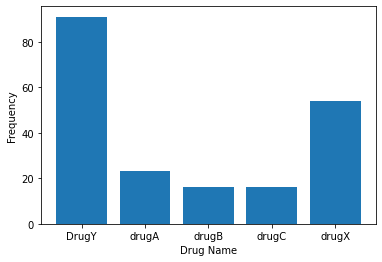

In [216]:
drug_class = drug.groupby('Drug').count()['Sex']
print(drug_class)
plt.bar(x=drug_class.index , height = drug_class)
plt.xlabel('Drug Name')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x7f490780a510>,
 [Text(0.15499131026807186, 1.0890260298732013, 'DrugY'),
  Text(-1.0966090594300018, -0.08630510283898195, 'drugA'),
  Text(-0.8475645040313473, -0.7011664649040886, 'drugB'),
  Text(-0.40493692751713584, -1.0227541663239421, 'drugC'),
  Text(0.7274431399250185, -0.8251220989502281, 'drugX')],
 [Text(0.08454071469167555, 0.5940141981126551, '46%'),
  Text(-0.5981503960527281, -0.0470755106394447, '12%'),
  Text(-0.46230791128982573, -0.3824544354022301, '8%'),
  Text(-0.22087468773661953, -0.5578659089039684, '8%'),
  Text(0.3967871672318282, -0.45006659942739713, '27%')])

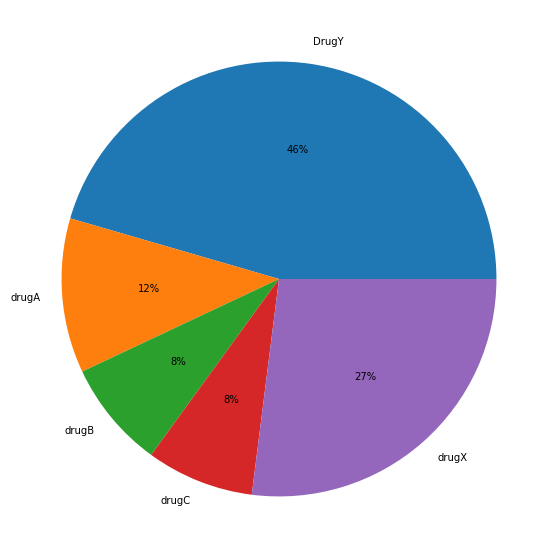

In [217]:
plt.figure(figsize=(10,10))
plt.pie(drug_class , labels=drug_class.index , autopct = '%0.0f%%')

Almost a majority of drugs lie in class Y while a quarter are drug X. Drug B and C are equal in number and constitute a total of just 16%.

**Drug Distribution by Age**

Text(0.5, 1.0, 'Drug by Age')

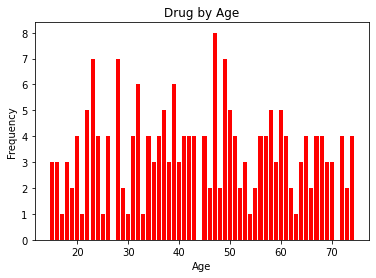

In [218]:
drug_age = drug.groupby('Age').count()['Drug']
plt.bar(x = drug_age.index , height = drug_age ,color = 'r')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Drug by Age')

In [219]:
top_age = drug_age.sort_values(ascending = False).head(10)
ta =pd.DataFrame(top_age)
ta1 = ta.drop(columns=['Drug'])
ta1['Frequency']= top_age
ta1

,Frequency
Age,
47,8
49,7
23,7
28,7
39,6
32,6
50,5
37,5
22,5


In [220]:
print('Average Age : ', np.mean(drug['Age']))

Average Age :  44.315


**Relation between Blood Pressure and Sodium-Potassium ratio**

In [221]:
sod_bp = drug.drop(columns=['Age','Sex','Cholesterol','Drug'])
sod_bp

,BP,Na_to_K
0,HIGH,25.355
1,LOW,13.093
2,LOW,10.114
3,NORMAL,7.798
4,LOW,18.043
...,...,...
195,LOW,11.567
196,LOW,12.006
197,NORMAL,9.894
198,NORMAL,14.020


In [222]:
bp_fact = pd.factorize(sod_bp['BP'])[0]
sod_bp['BP'] = bp_fact
sod_bp

,BP,Na_to_K
0,0,25.355
1,1,13.093
2,1,10.114
3,2,7.798
4,1,18.043
...,...,...
195,1,11.567
196,1,12.006
197,2,9.894
198,2,14.020


<AxesSubplot:>

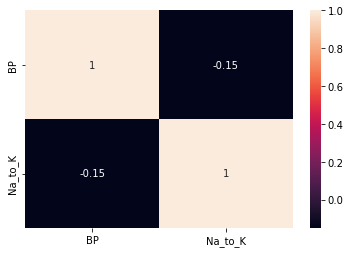

In [223]:
sns.heatmap(sod_bp.corr(), annot = True)

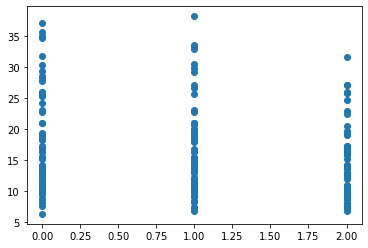

In [224]:
plt.scatter(x=sod_bp['BP'], y = sod_bp['Na_to_K'])

There's not much of a relation between these two parameters


**Drug Distribution by Sodium_Potassium ratio**

In [225]:
sod_pot = drug.sort_values(by = 'Na_to_K', ascending = False)
sod_pot

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,F,LOW,HIGH,38.247,DrugY
184,18,F,HIGH,HIGH,37.188,DrugY
98,20,M,HIGH,NORMAL,35.639,DrugY
188,65,M,HIGH,NORMAL,34.997,DrugY
194,46,F,HIGH,HIGH,34.686,DrugY
...,...,...,...,...,...,...
35,46,M,NORMAL,NORMAL,7.285,drugX
152,55,M,NORMAL,NORMAL,7.261,drugX
193,72,M,LOW,HIGH,6.769,drugC
111,47,F,NORMAL,NORMAL,6.683,drugX


Text(0.5, 1.0, 'Sodium to Potassium ratio')

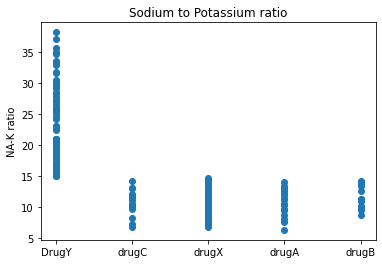

In [226]:
plt.scatter(x = drug['Drug'],y = drug['Na_to_K'] )
plt.ylabel('NA-K ratio')
plt.title('Sodium to Potassium ratio')

DrugY mostly contains higher Sodium to Potassium ratio

# **Applying Machine Learning Model**

In [227]:
drug.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**Preparing the Dataset for applying ML models using pandas.factorize**

Pandas factorize function will assign integer values to different classes. For example : It can assign 0 to x, 1 to y, 2 to z. ML models need numbers to work and this function does exactly what a model needs !

In [228]:
drug_fact = pd.DataFrame(drug['Age'], index = np.arange(0,200,1))
for column in drug :
    if drug[column].dtype == 'object':
        drug_fact[column] = pd.factorize(drug[column])[0]
drug_fact['Na_to_K'] = drug['Na_to_K']
drug_fact

,Age,Sex,BP,Cholesterol,Drug,Na_to_K
0,23,0,0,0,0,25.355
1,47,1,1,0,1,13.093
2,47,1,1,0,1,10.114
3,28,0,2,0,2,7.798
4,61,0,1,0,0,18.043
...,...,...,...,...,...,...
195,56,0,1,0,1,11.567
196,16,1,1,0,1,12.006
197,52,1,2,0,2,9.894
198,23,1,2,1,2,14.020


In [229]:
drug_fact.describe()

,Age,Sex,BP,Cholesterol,Drug,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,1.285000,16.084485
std,16.544315,0.500854,0.821752,0.501029,1.353861,7.223956
min,15.000000,0.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,1.000000,0.000000,1.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,2.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,4.000000,38.247000


<AxesSubplot:>

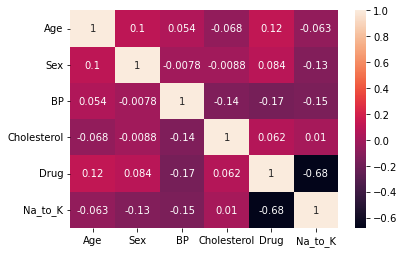

In [230]:
sns.heatmap(drug_fact.corr(), annot= True)

In [231]:
x =  drug_fact.drop(columns = ['Drug'])
y = drug_fact['Drug']
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [241]:
model = GNB()
train = model.fit(x_train , y_train)
pred = train.predict(x_test)
pred

array([0, 0, 2, 0, 0, 1, 2, 4, 2, 2, 3, 1, 3, 3, 3, 0, 0, 1, 2, 0, 2, 4,
       0, 0, 4, 0, 3, 0, 0, 0, 2, 4, 3, 4, 0, 0, 1, 2, 3, 1])

In [242]:
score = accuracy_score(pred, y_test)
print('accuracy score (%) : ', score*100)

accuracy score (%) :  82.5


In [234]:
print('correct predictions : ', 40*score , 'out of 40' )

correct predictions :  33.0 out of 40


* Best run using K nearest Neighbors (default parameters) : 75 % accuracy
* Best run using K nearest Neighbors (n_neighbors = 10) : 55% accuracy
* Best run using K nearest Neighbors (n_neighbors = 5) : 60% accuracy
* Best run using K nearest Neighbors (n_neighbors = 2) : 50 % accuracy
* Best run using K nearest Neighbors (n_neighbors = 1) : 57.5 % accuracy
* Best run using MLPClassifier (default) : 67.5 % accuracy
* Best run using Naive Bayes (default) : 95 % accuracy

# **Feeding random inputs**

In [235]:
age = input('enter Age')
sex = input(r'enter Sex(M/F)')
bp = input(r'enter BP(LOW/NORMAL/HIGH)')
chol = input(r'enter Cholesterol level(NORMAL/HIGH)')
na_to_k = input(r'enter Na_to_K ratio(upto 3 decimals)')

enter Age 47
enter Sex(M/F) M
enter BP(LOW/NORMAL/HIGH) LOW
enter Cholesterol level(NORMAL/HIGH) HIGH
enter Na_to_K ratio(upto 3 decimals) 13.093


In [236]:
def fact_sex(sex):
    if sex == 'M' :
        sex = 1
    else :
        sex = 0
    return sex
def fact_bp(bp):
    if bp == 'HIGH':
        bp = 0
    elif bp == 'LOW':
        bp = 1
    elif bp== 'NORMAL' :
        bp = 2
    return bp
def fact_chol(chol):
    if chol == 'HIGH' :
        chol = 0
    else :
        chol = 1
    return chol  

In [237]:
def predictdrug():
    sex1 = fact_sex(sex)
    bp1 = fact_bp(bp)
    chol1 = fact_chol(chol)
    input_rand= np.array([age , sex1 , bp1 ,chol1 , na_to_k],dtype=float)
    col = drug.columns
    inputdrug = pd.DataFrame({col[0]:input_rand[0],col[1]:sex1,col[2]:bp1,
                             col[3]:chol1,col[4]:na_to_k}, index=[0,1,2,3,4])
    return train.predict(inputdrug.iloc[0:1,:])[0]
result = predictdrug()
result

1

In [238]:
def pred(result):
    if result == 0 :
        result = 'DrugY'
    elif result == 1 :
        result = 'DrugC'
    elif result == 2:
        result = 'DrugX'
    elif result == 3 :
        result = 'DrugA'
    elif result == 4 :
        result = 'DrugB'
    return result
pred(result)

'DrugC'

In test case, I fed the second row of the original dataset as the input and it correctly predicted the drug as DrugC.